In [2]:
%notebook inline
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST.csv')

In [4]:
train.head()

,AT,V,AP,RH,PE
0,22.85,60.29,1017.29,61.92,448.58
1,11.75,35.76,1018.99,57.92,473.01
2,12.24,44.90,1020.31,82.22,464.25
3,13.43,40.10,1015.82,87.90,471.77
4,4.65,35.19,1018.23,94.78,489.36


In [5]:
test.head()

,AT,V,AP,RH
0,11.55,40.60,1014.44,87.06
1,6.61,38.91,1015.77,92.31
2,16.97,42.86,1013.92,74.80
3,21.90,57.76,1017.45,66.89
4,9.73,40.22,1011.48,87.88


<AxesSubplot:>

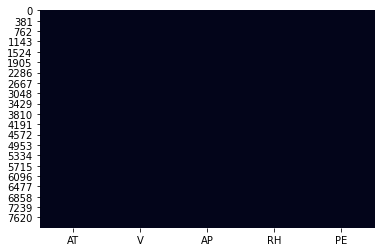

In [6]:
sns.heatmap(train.isnull(), cbar=False)

<AxesSubplot:>

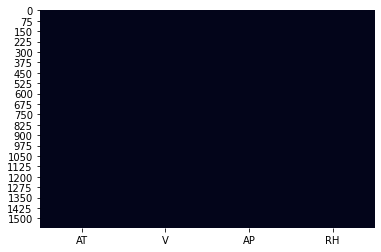

In [7]:
sns.heatmap(test.isnull(), cbar=False)

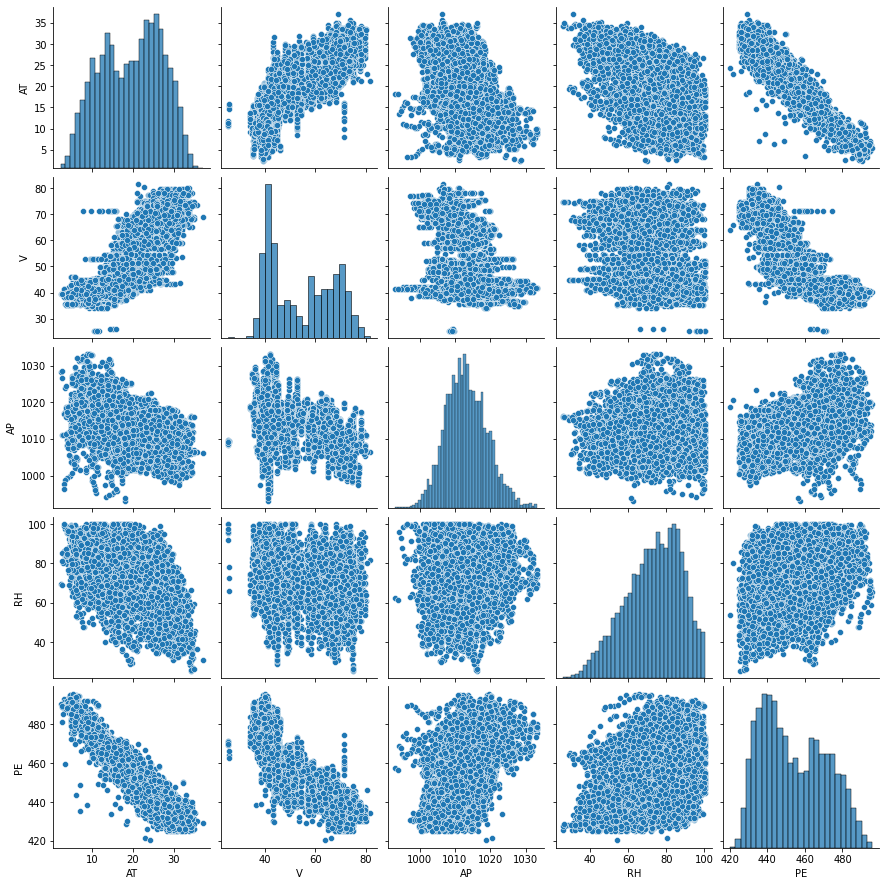

In [8]:
sns.pairplot(train)

C:\Users\adih4\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AT', ylabel='PE'>

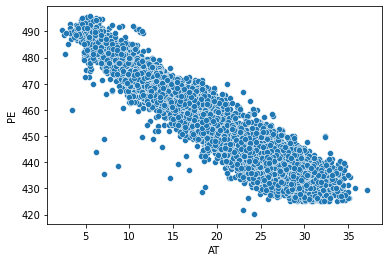

In [15]:
sns.scatterplot('AT', 'PE', data=train)

C:\Users\adih4\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='V', ylabel='PE'>

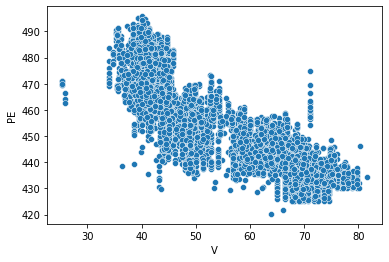

In [16]:
sns.scatterplot('V', 'PE', data=train)

<AxesSubplot:xlabel='AP', ylabel='PE'>

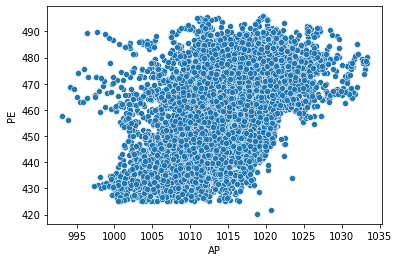

In [18]:
sns.scatterplot('AP', 'PE', data=train)

C:\Users\adih4\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RH', ylabel='PE'>

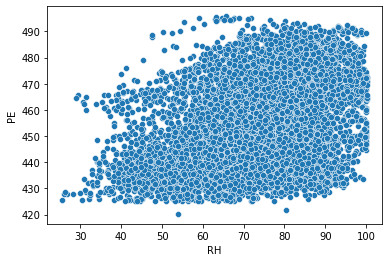

In [19]:
sns.scatterplot('RH', 'PE', data=train)

# Linear Regression without any Feature Scaling

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [30]:
X = pd.DataFrame(train.drop('PE', axis=1))
y = pd.DataFrame(train['PE'])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_test)

In [37]:
y_pred

array([[467.17203653],
       [465.08193319],
       [428.9436616 ],
       ...,
       [482.20612356],
       [441.28139752],
       [447.06248487]])

In [38]:
y_test

,PE
3040,469.80
974,460.56
1675,431.32
6800,471.07
3941,474.35
...,...
469,466.50
3088,479.32
5067,480.47
3741,439.98


In [51]:
x_test = test
y_test_pred = pd.DataFrame(lr.predict(test))
y_test_pred.index.name = 'Index'
y_test_pred.rename(columns = {0:'Value'}, inplace=True)

In [53]:
y_test_pred.to_csv('submission.csv')

# XGB Regression without hyperparameter tuning

In [69]:
from xgboost import XGBRegressor

In [70]:
xg = XGBRegressor(verbosity=1)

In [71]:
xg

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=1)

In [72]:
xg.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [73]:
y_pred = xg.predict(test)

In [74]:
x_test = test
y_test_pred = pd.DataFrame(xg.predict(test))
y_test_pred.index.name = 'Index'
y_test_pred.rename(columns = {0:'Value'}, inplace=True)

In [75]:
y_test_pred.to_csv('submission.csv')

# XGBRegressor Hyperparameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV

In [149]:
xgb1 = XGBRegressor()
parameters = {'nthread':[2,4,8], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.01, .03, 0.05, .07, .09], #so called `eta` value
              'max_depth': [2, 5, 6, 7, 9, 11, 14, 17],
              'min_child_weight': [2, 4, 6, 8],
              'silent': [1],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [0.7, 0.8],
              'n_estimators': [500, 1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [150]:
xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 3840 candidates, totalling 7680 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   10.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   54.5s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  2.7min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  6.8min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed: 10.2min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 17.1min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 25.6min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 34.9min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 44.8min
[Parallel(n_jobs=5)]: Done 4990 tasks      | elapsed: 54.3min
[Parallel(n_jobs=5)]: Done 6040 tasks      | elapsed: 69.5min
[Parallel(n_jobs=5)]: Done 7190 tasks      | elapsed: 85.1min
[Parallel(n_jobs=5)]: Done 7680 out of 7680 | elapsed: 94.0min finished


[01:56:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:56:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9614327255372809
{'colsample_bytree': 0.8, 'learning_rate': 0.03, 'max_depth': 9, 'min_child_weight': 2, 'n_estimators': 1000, 'nthread': 2, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.8}


In [151]:
xg = XGBRegressor(colsample_bytree= 0.8, 
                  learning_rate= 0.03, 
                  max_depth= 9, 
                  min_child_weight= 2, 
                  n_estimators= 1000, 
                  nthread= 2, 
                  objective= 'reg:linear', 
                  silent= 1, 
                  subsample= 0.8,
                 random_state=42)

In [152]:
xg.fit(X,y)

[01:58:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:58:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=9,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=2, nthread=2, num_parallel_tree=1,
             objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [153]:
x_test = test
y_test_pred = pd.DataFrame(xg.predict(test))
y_test_pred.index.name = 'Index'
y_test_pred.rename(columns = {0:'Value'}, inplace=True)

In [154]:
y_test_pred.to_csv('submission.csv')

# ExtraTreeRegressor

In [125]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

In [141]:
y.values.flatten()

array([448.58, 473.01, 464.25, ..., 465.14, 439.73, 481.46])

In [142]:
model = ExtraTreesRegressor(n_estimators=100, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35, max_features=150)
                            
gsc = GridSearchCV(
    estimator=model,
    return_train_score=True,
    param_grid={
        'n_estimators': range(50,126,25),
        'max_features': range(1,5),
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
    },
    scoring='r2',
    cv=5
)

grid_result = gsc.fit(X,y.values.flatten())

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

for test_mean, train_mean, param in zip(
        grid_result.cv_results_['mean_test_score'],
        grid_result.cv_results_['mean_train_score'],
        grid_result.cv_results_['params']):
    print("Train: %f // Test : %f with: %r" % (train_mean, test_mean, param))
    
model = ExtraTreesRegressor(**grid_result.best_params_)

model.fit(X,y.values.flatten())

Best: 0.944174 using {'max_features': 4, 'min_samples_leaf': 20, 'min_samples_split': 15, 'n_estimators': 75}
Train: 0.719105 // Test : 0.717357 with: {'max_features': 1, 'min_samples_leaf': 20, 'min_samples_split': 15, 'n_estimators': 50}
Train: 0.742643 // Test : 0.740987 with: {'max_features': 1, 'min_samples_leaf': 20, 'min_samples_split': 15, 'n_estimators': 75}
Train: 0.723848 // Test : 0.723613 with: {'max_features': 1, 'min_samples_leaf': 20, 'min_samples_split': 15, 'n_estimators': 100}
Train: 0.724992 // Test : 0.724227 with: {'max_features': 1, 'min_samples_leaf': 20, 'min_samples_split': 15, 'n_estimators': 125}
Train: 0.757486 // Test : 0.755414 with: {'max_features': 1, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 50}
Train: 0.722786 // Test : 0.721810 with: {'max_features': 1, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 75}
Train: 0.724342 // Test : 0.723729 with: {'max_features': 1, 'min_samples_leaf': 20, 'min_samples_split': 20

ExtraTreesRegressor(max_features=4, min_samples_leaf=20, min_samples_split=15,
                    n_estimators=75)

In [143]:
x_test = test
y_test_pred = pd.DataFrame(model.predict(test))
y_test_pred.index.name = 'Index'
y_test_pred.rename(columns = {0:'Value'}, inplace=True)

In [144]:
y_test_pred.to_csv('submission.csv')